In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.6.0'

## Load & Explore data

In [2]:
mnist = input_data.read_data_sets('data/mnist/input_data', one_hot=True)
mnist

Extracting data/mnist/input_data\train-images-idx3-ubyte.gz
Extracting data/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting data/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting data/mnist/input_data\t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000176AF64E438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000176AF68D630>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000176AF68D668>)

In [3]:
print("""
< 주석 >

데이타셋명               |  행렬차원     |  데이타종류
==============================================================
mnist.train.images       |  55000 x 784  |  학습이미지데이타
mnist.train.labels       |  55000 x 10   |  학습라벨데이타
mnist.test.images        |  10000 x 784  |  테스트용이미지데이타
mnist.test.labels        |  10000 x 10   |  테스트용라벨데이타
mnist.validation.images  |  5000 x 784   |  확인용이미지데이타
mnist.validation.labels  |  5000 x 10    |  확인용라벨데이타
""")


< 주석 >

데이타셋명               |  행렬차원     |  데이타종류
mnist.train.images       |  55000 x 784  |  학습이미지데이타
mnist.train.labels       |  55000 x 10   |  학습라벨데이타
mnist.test.images        |  10000 x 784  |  테스트용이미지데이타
mnist.test.labels        |  10000 x 10   |  테스트용라벨데이타
mnist.validation.images  |  5000 x 784   |  확인용이미지데이타
mnist.validation.labels  |  5000 x 10    |  확인용라벨데이타



In [4]:
print(mnist.train.images.shape)
mnist.train.images

(55000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

>>> answer : 7


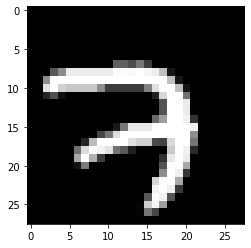

In [5]:
idx = 0
tmp_label = mnist.train.labels[idx]
tmp_img = mnist.train.images[idx]
tmp_img_reshape = tmp_img.reshape((28,28))

print(f'>>> answer : {tmp_label.tolist().index(1)}')
plt.imshow(tmp_img_reshape, cmap='gray')
plt.show()

## Generate a graph (model)

In [6]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_lab = tf.placeholder(dtype=tf.float32, shape=[None, 10])

w = tf.Variable(tf.zeros(shape=(784, 10)))
b = tf.Variable(tf.zeros(shape=10))
hidden_y = tf.matmul(x, w) + b
output_y = tf.nn.softmax(hidden_y)

# Loss function, optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_lab, logits=hidden_y))  # input hidden_y to logits, not output_y
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## Train the model

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    tmp_cost, _ = sess.run([cost, train], feed_dict={x:batch_x, y_lab:batch_y})
    
    if epoch % 300 == 0 or epoch>997:
        print(f'epoch : {epoch:5}  |  cost : {tmp_cost:.4f}')
    pass

final_w, final_b = sess.run([w, b])
print(f'\nfinal weights : \n{final_w}')
print(f'\nfinal bias : \n{final_b}')

epoch :     0  |  cost : 2.3026
epoch :   300  |  cost : 0.2252
epoch :   600  |  cost : 0.4554
epoch :   900  |  cost : 0.2532
epoch :   998  |  cost : 0.3286
epoch :   999  |  cost : 0.4161

final weights : 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

final bias : 
[-0.3545782   0.38716653  0.10573937 -0.24385175  0.00817225  1.2831113
 -0.12489797  0.63385475 -1.4596324  -0.23508357]


## Evaluate the model

In [8]:
corrects = tf.equal( tf.argmax(y_lab, 1), tf.argmax(output_y, 1) )
accuracy = tf.reduce_mean(tf.cast(corrects, dtype=tf.float32))

acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y_lab:mnist.test.labels})
print(f'accuracy : {acc:.4f}')

accuracy : 0.9185
